# May 25th - Visualize the best Airbnb digs with Pandas and Matplotlib
*© 2022 Colin Conrad*

Last week we explored how to use _libraries_ to make our lives easier, as well as some of the Python basics. We used these skills to import CSV files into our Python framework to conduct some basic data cleaning. With this knowledge in hand, you are now ready to start working with data more earnestly. This week we will use `Pandas` the most common Python data frame library, often used by data scientists and researchers to conduct their day-to-day activities. The [Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) dataframe is a tool which makes it easier to navigate and analyze large datasets. Built upon numpy and other dependencies, this tool is among the most essential resources for conducting analysis on larger datasets. Like basic Python, we will use this tool in nearly all subsequent exercises, so be sure to watch this one closely.

**This week, we will achieve the following objectives:**
- Turn your dataset into a dataframe and build a simple query
- Observe additional features and create an advanced query
- Collect descriptive statistics from your dataframe
- Make changes to your dataframe
- Visualize the price of Airbnb in Manhattan

Helpful reading: [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# Case: Airbnb
It's pretty likely that you know something about [Airbnb](https://www.airbnb.ca/). Airbnb has been called the [world's largest hotel chain](https://www.bizjournals.com/sanfrancisco/news/2017/08/11/airbnb-surpasses-ihg-wyn-hilton-marriott-listings.html), while owning no hotels themselves. As a crowdsourcing platform, users can list their properties and rent them out to short-term renters using the Airbnb app. Though the company is not yet 13 years old as of January 2021, it has a market valuation of $113 billion, nearly 13 times the estimated value of Hilton hotel brands (the most valuable hotel chain).

Airbnb is not without controversy. Airbnb has been identified by the [Economic Policy Institute](https://www.epi.org/publication/the-economic-costs-and-benefits-of-airbnb-no-reason-for-local-policymakers-to-let-airbnb-bypass-tax-or-regulatory-obligations/) as an important factor in rising rent an property prices, despite often escaping tax and regulation. The company [regularly releases their application data publicly](http://insideairbnb.com/get-the-data.html). Though we cannot investigate this phenomenon in one lab, this is a useful resource for learning about data science tools.

# Objective 1: Turn your dataset into a dataframe and build a simple query
As discussed in class, pandas is a framework built on top of the numpy library designed to make data science easier. Numpy is a tool for transforming your data into a multi-dimensional array, sort of like a hyper-efficient Python list. It's not great to use unless you are interested in going deep into machine learning. The pandas (PANel + DAta) library transforms our data into numerical tables (a.k.a. data frames) which are easier to calculate and sort through. We will start with Pandas because this is the tool that will be most useful for us.

To transform a csv file into a pandas object we need to import the pandas library. We can then import a csv file by using pandas' built-in read_csv feature.

In [1]:
import pandas as pd # import pandas 

import numpy as np # import numpy; it's usually a good practice to import this as well

import matplotlib.pyplot as plt # we will use this to visualize later

nyc = pd.read_csv('data/nyc.csv') # command pandas to import the data; isn't this easier than the csv library?

### Dataframe head
Once our data frame has been imported we can apply a few methods that can generate knowledge about the dataset. The `head()` method gives us a summary of the first five items in the dataset.

In [3]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127


### Dataframe series

Data frames are easily navigable compared to lists or dictionaries. If we want to retrieve all of the data from a column in the dataframe, we can call that column similarly to calling a method. The code below will give us the values for `neighbourhood_group` from the whole dataset, but will give us only the first and last values when printed. This is super-handy!

In [4]:
nyc.neighbourhood_group

0        Manhattan
1        Manhattan
2         Brooklyn
3        Manhattan
4        Manhattan
           ...    
48859       Queens
48860    Manhattan
48861    Manhattan
48862    Manhattan
48863    Manhattan
Name: neighbourhood_group, Length: 48864, dtype: object

### A transposed dataframe

Some things that are somewhat cumbersome with lists and dictionaries are also very simple with pandas. For instance, if we wish to transpose our data (make the rows columns and the columns rows) we can use the `.T` method. This can be helpful when making calculations across entities.

In [5]:
nyc.T

,0,1,2,3,4,5,6,7,8,9,...,48854,48855,48856,48857,48858,48859,48860,48861,48862,48863
id,2595,3647,3831,5022,5099,5121,5178,5203,5222,5238,...,37495430,37495612,37497371,37497491,37497706,37497806,37497989,37498824,37499051,37499093
name,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Best Hideaway,Cute & Cozy Lower East Side 1 bdrm,...,Extremely Spacious 5 BR Loft In TriBeca Near S...,Clean & Modern Studio APT in the center of K-TOWN,Private Room,Comfortable 3 bedroom homebase in Bushwick,Large Two Bedroom in Bronx Little Italy,Overnighter / Weekender,East Harlem's Best Kept Secret,"Perfect, Brand New 1 Bedroom Apartment In Midtown",Large bedroom overlooking Riverside,Brand New Spacious 1 Bedroom Apt In Hells Kitchen
host_id,2845,4632,4869,7192,7322,7356,8967,7490,7516,7549,...,158059664,72715640,35927005,29637230,44851966,283024389,299391,113464126,7941569,132699715
host_name,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris,Garon,Shunichi,MaryEllen,Marilyn,Ben,...,Ej,Haeshin,Kathy,Andrew,Joseph,Ezra,Alquena,Zach,Pam,Ed
neighbourhood_group,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan,Manhattan,...,Manhattan,Manhattan,Manhattan,Brooklyn,Bronx,Queens,Manhattan,Manhattan,Manhattan,Manhattan
neighbourhood,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,East Village,Chinatown,...,Tribeca,Midtown,Hell's Kitchen,Bushwick,Belmont,Astoria,East Harlem,Hell's Kitchen,Morningside Heights,Hell's Kitchen
latitude,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.72764,40.71344,...,40.71255,40.74802,40.76104,40.6943,40.85581,40.77321,40.80504,40.76207,40.81574,40.76825
longitude,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.97949,-73.99037,...,-74.00939,-73.98575,-73.99249,-73.92283,-73.88425,-73.92567,-73.93774,-73.98818,-73.95931,-73.98972
room_type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt,Entire home/apt,...,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Shared room,Private room,Entire home/apt,Private room,Entire home/apt
price,225,150,89,80,200,60,79,79,116,150,...,709,180,135,300,130,65,60,239,75,239


### Sort values
In addition, dataframes can be easily sorted. These sorting features are similar to SQL (_Structured Query Language_) which many of you will be familiar with. The following code will sort the data by price starting with the highest values. 

I wonder who seriously believes that they can rent an apartment for $10 000 per night?! It must be fancy!

In [8]:
nyc.sort_values(by='last_review', ascending=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
313,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0
160,40039,Luxurious Condo in DUBMO with View,171851,Henry,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250,3,14,2011-04-25,0.13,1,218
326,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,53
123,28396,Modern Apt with Spectacular Views,6197784,Jo,Brooklyn,Williamsburg,40.71923,-73.96468,Private room,90,1,9,2011-09-18,0.08,1,274
141,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48859,37497806,Overnighter / Weekender,283024389,Ezra,Queens,Astoria,40.77321,-73.92567,Shared room,65,1,0,NaN,NaN,1,53
48860,37497989,East Harlem's Best Kept Secret,299391,Alquena,Manhattan,East Harlem,40.80504,-73.93774,Private room,60,2,0,NaN,NaN,1,53
48861,37498824,"Perfect, Brand New 1 Bedroom Apartment In Midtown",113464126,Zach,Manhattan,Hell's Kitchen,40.76207,-73.98818,Entire home/apt,239,1,0,NaN,NaN,1,105
48862,37499051,Large bedroom overlooking Riverside,7941569,Pam,Manhattan,Morningside Heights,40.81574,-73.95931,Private room,75,1,0,NaN,NaN,1,14


## *Challenge Question 1*
Using the `sort` function on the `nyc` dataframe, conduct a query that can be used to discover which listing has the highest `reviews_per_month`. Provide a comment which indicates your opinion about whether this value is an anomoly. 

In [10]:
nyc.sort_values(by='reviews_per_month', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
40959,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,242,2019-08-04,66.61,9,271
40960,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,129,2019-08-05,33.08,9,271
37924,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,46,1,56,2019-08-06,20.49,2,133
26799,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,410,2019-07-16,19.19,3,37
28143,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,348,2019-07-15,17.31,3,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48859,37497806,Overnighter / Weekender,283024389,Ezra,Queens,Astoria,40.77321,-73.92567,Shared room,65,1,0,NaN,NaN,1,53
48860,37497989,East Harlem's Best Kept Secret,299391,Alquena,Manhattan,East Harlem,40.80504,-73.93774,Private room,60,2,0,NaN,NaN,1,53
48861,37498824,"Perfect, Brand New 1 Bedroom Apartment In Midtown",113464126,Zach,Manhattan,Hell's Kitchen,40.76207,-73.98818,Entire home/apt,239,1,0,NaN,NaN,1,105
48862,37499051,Large bedroom overlooking Riverside,7941569,Pam,Manhattan,Morningside Heights,40.81574,-73.95931,Private room,75,1,0,NaN,NaN,1,14


## *Challenge Question 2*
Using the `nyc` dataframe, conduct a simple query to retrieve the last five rows in the dataframe. There is a pandas method to do this-- be sure to read _10 minutes to pandas_ to learn more!

In [15]:
nyc.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,434,2019-07-13,3.48,1,239
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.98,1,0
8,5222,Best Hideaway,7516,Marilyn,Manhattan,East Village,40.72764,-73.97949,Entire home/apt,116,30,94,2016-06-15,0.74,1,322
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,161,2019-07-29,1.33,4,0


# Objective 2: Observe additional features and create an advanced query
## Subsetting the data
Dataframes are for a lot more than performing large observations. Perhaps the coolest feature of a dataframe is that it facilitates efficient queries and to retrieve subsets of the data. In pandas, a subset is declared by writing square brackets following the data frame-- for instance, `nyc['neighbourhood_group']` would return the values of neighborhood. However, we can also use this to conduct Boolean searches as well. For instance, if we wanted to retrieve only the values where `neighbourhood_group == Brooklyn` we could write a query as follows.

In [16]:
nyc[nyc.neighbourhood_group == 'Brooklyn']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.33,3,324
14,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,154,2019-08-02,1.24,1,23
15,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,200,2019-07-30,1.72,1,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48843,37493416,AMAZING! 7bd/4ba TownHome + PATIO - 10 Mins To...,16625273,Richard,Brooklyn,Williamsburg,40.71571,-73.94626,Entire home/apt,895,2,0,NaN,NaN,3,337
48845,37493849,Luxury two bedroom apt 3 minutes walk to the t...,66835858,Alejandra,Brooklyn,Windsor Terrace,40.64975,-73.97282,Entire home/apt,280,3,0,NaN,NaN,2,83
48846,37493858,Amazing 3bd/2ba Town-Home In Prime Williamsburg,16625273,Richard,Brooklyn,Williamsburg,40.71571,-73.94626,Entire home/apt,395,2,0,NaN,NaN,3,332
48848,37494358,Williamsburg Condo,3370962,Leroy,Brooklyn,Williamsburg,40.71121,-73.96581,Entire home/apt,100,2,0,NaN,NaN,1,0


### Sorting subsets

Similarly, to before, if we wanted to list the values from Brooklyn according to price, we can create a new data frame which is equal to this subset and sort it by price.

In [17]:
brooklyn = nyc[nyc.neighbourhood_group == 'Brooklyn']

brooklyn.sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17398,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
4282,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
44294,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,11,2019-08-04,4.93,3,180
3679,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
25364,20654227,Fulton 2,100069033,Sarah-2,Brooklyn,Cypress Hills,40.68185,-73.88128,Entire home/apt,5000,2,4,2018-01-03,0.17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25332,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,98,2019-07-22,4.32,6,174
25172,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.68,5,0
25290,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.51,2,0
26359,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.10,6,361


### Sort by date-time
Pretty cool! Another feature of pandas is that it recognizes common data types which are not recognized as distinct types by Python itself. For example, pandas dataframes are optimized to recognize date and time formats. If we want to sort a search by `last_review`, for instance, we could conduct a similar query as with `price`.

In [19]:
recent_brooklyn

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.33,3,324
14,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,154,2019-08-02,1.24,1,23
15,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,200,2019-07-30,1.72,1,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48843,37493416,AMAZING! 7bd/4ba TownHome + PATIO - 10 Mins To...,16625273,Richard,Brooklyn,Williamsburg,40.71571,-73.94626,Entire home/apt,895,2,0,NaN,NaN,3,337
48845,37493849,Luxury two bedroom apt 3 minutes walk to the t...,66835858,Alejandra,Brooklyn,Windsor Terrace,40.64975,-73.97282,Entire home/apt,280,3,0,NaN,NaN,2,83
48846,37493858,Amazing 3bd/2ba Town-Home In Prime Williamsburg,16625273,Richard,Brooklyn,Williamsburg,40.71571,-73.94626,Entire home/apt,395,2,0,NaN,NaN,3,332
48848,37494358,Williamsburg Condo,3370962,Leroy,Brooklyn,Williamsburg,40.71121,-73.96581,Entire home/apt,100,2,0,NaN,NaN,1,0


In [20]:
recent_brooklyn = nyc[(nyc.neighbourhood_group == 'Brooklyn')]

recent_brooklyn.sort_values(by='last_review', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48694,37416939,Sunny artist's loft in converted factory,226204224,Allyson,Brooklyn,Bushwick,40.70497,-73.92173,Private room,60,1,2,2019-08-15,2.00,1,1
42757,33989972,MONTAUK HEIGHTS,152503673,Idemudia,Brooklyn,East New York,40.67562,-73.87763,Entire home/apt,89,3,15,2019-08-06,4.46,1,6
30556,24181763,"Private Room in Bklyn, 1 min to J, Free Breakfast",182260692,Leesha,Brooklyn,Cypress Hills,40.68168,-73.87882,Private room,99,2,75,2019-08-06,4.82,2,281
31300,24913445,Bright sunny room in Bushwick with backyard.,7780845,Liset,Brooklyn,Bushwick,40.70269,-73.91778,Private room,65,2,23,2019-08-06,1.68,3,282
46699,36279375,"Cozy, bohemian vibe private room",220991097,Jessica,Brooklyn,East New York,40.67303,-73.88621,Private room,50,1,3,2019-08-06,3.00,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48843,37493416,AMAZING! 7bd/4ba TownHome + PATIO - 10 Mins To...,16625273,Richard,Brooklyn,Williamsburg,40.71571,-73.94626,Entire home/apt,895,2,0,NaN,NaN,3,337
48845,37493849,Luxury two bedroom apt 3 minutes walk to the t...,66835858,Alejandra,Brooklyn,Windsor Terrace,40.64975,-73.97282,Entire home/apt,280,3,0,NaN,NaN,2,83
48846,37493858,Amazing 3bd/2ba Town-Home In Prime Williamsburg,16625273,Richard,Brooklyn,Williamsburg,40.71571,-73.94626,Entire home/apt,395,2,0,NaN,NaN,3,332
48848,37494358,Williamsburg Condo,3370962,Leroy,Brooklyn,Williamsburg,40.71121,-73.96581,Entire home/apt,100,2,0,NaN,NaN,1,0


### Query using two conditions

Queries can also be more complex. If we wish to choose a subset of data which is constrained by two conditions, we can include both conditions by using the `&` operator. The following query will retrieve the values that match `Brooklyn` which also have a `last_review` equal to `2019-08-06`, the date that I seem to have retrieved this data.

In [21]:
recent_brooklyn = nyc[(nyc.neighbourhood_group == 'Brooklyn') & 
                      (nyc.last_review == '2019-08-06')]

recent_brooklyn.sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
45468,35569456,"2 BR Modern Apt, Extra Lofted Bed, BK Heights",267621090,Shameika,Brooklyn,Brooklyn Heights,40.69934,-73.99635,Entire home/apt,600,3,8,2019-08-06,5.11,1,19
31591,25202604,Luxurious Apt2 with Manhattan views on roof deck,153565366,Hugo,Brooklyn,Park Slope,40.67638,-73.98278,Entire home/apt,295,4,20,2019-08-06,1.64,3,30
14597,11753760,Gorgeous apartment in Brownstone,62542300,Gary,Brooklyn,South Slope,40.66736,-73.98773,Private room,140,2,146,2019-08-06,3.67,1,265
37633,30325604,1 BDRM avail in sunny apartment in Williamsburg,10860700,Sarah,Brooklyn,Williamsburg,40.71293,-73.94283,Private room,120,2,16,2019-08-06,2.20,2,0
43975,34670295,Mini mansion,257320771,Ramie,Brooklyn,Bay Ridge,40.62094,-74.02422,Entire home/apt,100,1,12,2019-08-06,4.34,1,295
30556,24181763,"Private Room in Bklyn, 1 min to J, Free Breakfast",182260692,Leesha,Brooklyn,Cypress Hills,40.68168,-73.87882,Private room,99,2,75,2019-08-06,4.82,2,281
42757,33989972,MONTAUK HEIGHTS,152503673,Idemudia,Brooklyn,East New York,40.67562,-73.87763,Entire home/apt,89,3,15,2019-08-06,4.46,1,6
16872,13589669,East Brooklyn Garden Apartment,78485066,Corie,Brooklyn,East New York,40.66380,-73.89307,Entire home/apt,85,1,113,2019-08-06,2.98,2,339
29651,23327774,Trendy Brooklyn Room - 20mins from Manhattan,129273512,Lisa& Jonathan,Brooklyn,Gowanus,40.67104,-73.99362,Private room,77,1,141,2019-08-06,7.89,3,311
34886,28278875,Cozy Comfortable Studio Suite,213568384,Shama,Brooklyn,Canarsie,40.63814,-73.90002,Entire home/apt,75,1,74,2019-08-06,7.45,1,279


### Querying using two conditions, one of which is an OR

Finally, we can also create nested queries. The following query searches for values which match `Brooklyn` but have a last_review in the two days prior.

In [22]:
recent_brooklyn = nyc[(nyc.neighbourhood_group == 'Brooklyn') & 
                      ((nyc.last_review == '2019-08-06') | (nyc.last_review == '2019-08-05'))]

recent_brooklyn.sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
45468,35569456,"2 BR Modern Apt, Extra Lofted Bed, BK Heights",267621090,Shameika,Brooklyn,Brooklyn Heights,40.69934,-73.99635,Entire home/apt,600,3,8,2019-08-06,5.11,1,19
46914,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,550,3,7,2019-08-05,6.56,1,36
41433,33046604,Brand New BK Duplex in the Center of it All!!!,65613634,Sam,Brooklyn,Bedford-Stuyvesant,40.68736,-73.93827,Entire home/apt,400,2,20,2019-08-05,5.88,1,283
47731,36931075,Amazing 4 bedroom duplex minutes to Manhattan!,277597160,Devin,Brooklyn,Carroll Gardens,40.68498,-73.99218,Entire home/apt,375,1,2,2019-08-05,2.00,1,79
31591,25202604,Luxurious Apt2 with Manhattan views on roof deck,153565366,Hugo,Brooklyn,Park Slope,40.67638,-73.98278,Entire home/apt,295,4,20,2019-08-06,1.64,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46257,36001142,ClintonHill CrashPad Next2Subway 24/7SelfCheck...,21261408,Jay,Brooklyn,Clinton Hill,40.68783,-73.96061,Shared room,40,1,10,2019-08-05,8.11,10,355
20783,16779548,Empire Room in Spacious Apartment,24283455,Igam,Brooklyn,Gravesend,40.58906,-73.98245,Private room,35,2,53,2019-08-05,1.75,2,5
37155,30043083,Home away from home lodging #1 (1 Bed- 1 guest),225790094,Vena,Brooklyn,East Flatbush,40.65129,-73.92696,Private room,35,1,12,2019-08-05,1.41,3,70
26981,21644783,Cozy Room in the heart of Bushwick,26738513,Malachi,Brooklyn,Bushwick,40.69290,-73.91681,Private room,32,3,27,2019-08-05,1.64,3,75


## *Challenge Question 3*
Using the `nyc` dataframe, conduct a query which retrieves the following:
- Rentals only from the `Queens` neighborhood
- Rentals with either more than 100 reviews or more than 5 reviews per month
- Rentals with a price of less than 200
- Rentals which are the `Entire home/apt` room type

Sort your findings by order of price, starting with the lowest price.

In [28]:
recent_queens = nyc[(nyc.neighbourhood_group == 'Queens') & 
                    ((nyc.reviews_per_month > 5) | (nyc.number_of_reviews > 100)) & 
                    (nyc.price < 200) &
                    (nyc.room_type == 'Entire home/apt')
                   ]

recent_queens.sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42794,34010131,Brand New & Beautiful. 1 min toTrain /15Min to...,22543458,Ashley,Queens,Ozone Park,40.67775,-73.86010,Entire home/apt,199,30,18,2019-08-04,5.68,4,252
43164,34229313,Astoria's Retreat 10min away from the city/PRKG,247092108,Jackie,Queens,Astoria,40.76683,-73.91435,Entire home/apt,195,1,17,2019-07-29,6.37,2,307
34581,27988211,Welcome Home To Ridgewood!,138203985,Alejandro,Queens,Ridgewood,40.70724,-73.91268,Entire home/apt,195,1,100,2019-08-04,8.65,1,129
10345,8081193,2 bedroom Home..2 metro/train stops to NY City,14946082,Alexandra,Queens,Long Island City,40.75644,-73.93486,Entire home/apt,195,3,126,2019-07-28,2.65,1,85
15977,13098701,NYCHaven4:Entire house minutes from JFK and Ca...,47351539,Jason,Queens,South Ozone Park,40.67321,-73.79247,Entire home/apt,195,1,243,2019-07-22,6.26,4,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39974,31909528,The clean separate studio in New York,51186155,Cherry,Queens,Flushing,40.73182,-73.79505,Entire home/apt,45,1,59,2019-07-30,9.22,1,59
20974,17007971,Charming Ground Floor,113558977,Je0,Queens,Rego Park,40.72651,-73.86173,Entire home/apt,40,1,108,2019-07-23,3.59,2,28
21495,17593461,(2R) Cozy and clean bedroom with private bathroom,119548006,Steven,Queens,Fresh Meadows,40.73318,-73.79322,Entire home/apt,39,2,116,2019-08-02,4.00,2,3
37302,30129734,Cozy Self Contained Private 1 Bedroom Apartment,221844597,Ayana,Queens,St. Albans,40.68739,-73.76598,Entire home/apt,35,1,63,2019-06-30,7.50,1,28


In [24]:
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Objective 2: Collect descriptive statistics from your dataframe
One of the most handy features of pandas dataframes is that they come with a few built-in methods for conducting descriptive analysis. For example, the `.describe()` method will give summary of statistical measures of a given dataframe.

In [29]:
nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.886400e+04,4.886400e+04,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,38733.000000,48864.000000,48864.000000
mean,1.940851e+07,6.943161e+07,40.728664,-73.951850,151.453176,7.093116,23.392191,1.365694,7.438278,112.483505
std,1.124290e+07,8.058217e+07,0.054794,0.046440,236.585525,20.264170,44.939690,1.692891,34.949053,132.373994
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.577635e+06,8.048590e+06,40.689797,-73.982953,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.994839e+07,3.168654e+07,40.722880,-73.955510,105.000000,2.000000,5.000000,0.710000,1.000000,41.000000
75%,2.974014e+07,1.096553e+08,40.762970,-73.935628,175.000000,5.000000,24.000000,2.000000,2.000000,232.000000
max,3.749909e+07,2.830244e+08,40.912400,-73.712990,10000.000000,1250.000000,639.000000,66.610000,343.000000,365.000000


### Describe a column
This is good, but perhaps too much to be useful. Instead, we could choose to apply `.describe()` to a single column. This will give us more manageable information.

In [30]:
nyc.price.describe()

count    48864.000000
mean       151.453176
std        236.585525
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Calculate the mean price
In addition, dataframes also have functions for calculating specific statistics such as mean, median and mode. To calculate the mean value of a column we can write the line below.

In [31]:
nyc.price.mean()

151.45317616240996

### Calculate the sum
Alternatively, if we wanted to find the sum of a column (e.g. the total number of reviews) we can use the sum function.

In [32]:
nyc.number_of_reviews.sum()

1143036

### Calculate number of unique values
Finally, there are a few other methods which are handy. For instance, the `.nunique()` method will tell use the number of unique values in a dataset.

In [33]:
nyc.host_id.nunique()

37384

## *Challenge Question 4*
Write code that calculates the median price for the property category of `'Entire home/apt'`. 

**Hint**: [This tutorial site](https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm) has a pretty good summary of dataframe functions.

In [38]:
entire_homes = nyc[nyc.room_type == 'Entire home/apt']

entire_homes.price.median()

160.0

## *Challenge Question 5*
Write code which finds the neighborhood (*not* neighbourhood_group) with the most listings. You can probably do this in one line, though if you choose to use a more complex function, you are welcome to do so! 

**Hint:** Consider reviewing the standard descriptive statistics: mean, median and mode

In [ ]:
# insert your code here

## *Challenge Question 6*
The `availability_365` column represents the number of days in the past year that the property was available to rent through the Airbnb app. Retrieve the number of listings in New York which were available every day of the previous year.

In [ ]:
# insert your code here

# Objective 4: Make changes to your dataframe
In addition to being navigable, dataframes are also relatively easy to change. For instance, if we wanted to insert a column, we could use the `.insert()` method. According to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html), this method requires four pieces of information: 
- Where to insert it
- The name of the column
- The value to be inserted
- Whether to allow duplicates

The code below inserts the value "Airbnb" in a column named `dataset`. This would be handy if we acquired our data from more than one source.

In [39]:
nyc.insert(2, "dataset", "Airbnb", True)
nyc

,id,name,dataset,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,Airbnb,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,Airbnb,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,Airbnb,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,Airbnb,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,Airbnb,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48859,37497806,Overnighter / Weekender,Airbnb,283024389,Ezra,Queens,Astoria,40.77321,-73.92567,Shared room,65,1,0,NaN,NaN,1,53
48860,37497989,East Harlem's Best Kept Secret,Airbnb,299391,Alquena,Manhattan,East Harlem,40.80504,-73.93774,Private room,60,2,0,NaN,NaN,1,53
48861,37498824,"Perfect, Brand New 1 Bedroom Apartment In Midtown",Airbnb,113464126,Zach,Manhattan,Hell's Kitchen,40.76207,-73.98818,Entire home/apt,239,1,0,NaN,NaN,1,105
48862,37499051,Large bedroom overlooking Riverside,Airbnb,7941569,Pam,Manhattan,Morningside Heights,40.81574,-73.95931,Private room,75,1,0,NaN,NaN,1,14


### Deleting data in python
This said, given that our data came from a single source, we have no need for this. To drop a column, we could choose to use the del keyword, which deletes objects stored in python. Note that this keyword is not unique to pandas and can be used for virtually anything in python.

In [40]:
del nyc['dataset']
nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48859,37497806,Overnighter / Weekender,283024389,Ezra,Queens,Astoria,40.77321,-73.92567,Shared room,65,1,0,NaN,NaN,1,53
48860,37497989,East Harlem's Best Kept Secret,299391,Alquena,Manhattan,East Harlem,40.80504,-73.93774,Private room,60,2,0,NaN,NaN,1,53
48861,37498824,"Perfect, Brand New 1 Bedroom Apartment In Midtown",113464126,Zach,Manhattan,Hell's Kitchen,40.76207,-73.98818,Entire home/apt,239,1,0,NaN,NaN,1,105
48862,37499051,Large bedroom overlooking Riverside,7941569,Pam,Manhattan,Morningside Heights,40.81574,-73.95931,Private room,75,1,0,NaN,NaN,1,14


### The drop method
The proper way to drop a column in pandas however is to use the `.drop()` method. This method is used to drop rows or columns from a pandas dataframe. For instance, if we wished to drop the first entry we could use the following:

In [43]:
mod_nyc = nyc.drop([0, 1]) # create a new dataframe which has the first two values dropped

mod_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,434,2019-07-13,3.48,1,239


Pandas drops rows by default so we only needed to provide the indexes to make it happen. Alternatively, to drop columns we need to provide a label and an `axis=1` value to tell pandas to search for the column with said label. If we wished to remove the host names (say, in order to better preserve privacy) we could specify the following.

In [44]:
mod_nyc = nyc.drop(labels='host_name', axis=1) # create a new dataframe which has the first two values dropped

mod_nyc.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127


### Entering new columns
We can also add new columns to our dataframe. To create a new column, you can add the column values using a key/value format. The code below creates a new column called `reviews_to_avaliability_ratio` which calculates the number of reviews relative to the listing availability.

In [45]:
nyc['reviews_to_avaliability_ratio'] = nyc['number_of_reviews']/nyc['availability_365']

nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_to_avaliability_ratio
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,2019-07-14,0.39,2,288,0.159722
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0.000000
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,2019-07-26,4.64,1,212,1.292453
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,inf
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.60,1,127,0.590551


## *Challenge Question 7*
One measure which might be interesting in this dataset is the ratio of price to number of reviews. Create a new column called `price_to_review_ratio` which calculates the price divided by the reviews. Once you have added this column, provide code which prints the median value of this number.

In [ ]:
# insert your code here

# Objective 5: Visualize the prices of Airbnb in Manhattan
Finally, we are now ready to visualize the data. Pandas dataframes have built-in functions for conducting visualizations that leverage a popular data visualization library callend `matplotlib`. We will explore this library in more detail moving forward, but I wanted to conclude this week's session by giving you a taste of what it can do. In this case, we may wish to find which specific neighbourhoods in Manhattan have good Airbnb deals. Let's start by taking a subsegment of our dataframe.

In [46]:
manhattan = nyc[nyc["neighbourhood_group"] == "Manhattan"]

Even though this is a smaller subset of the data, it sill consists of 21 456 entries, which can be difficult to manage. To create an effective visualization, we may wish to simplify our data, such as by calculating the median value of each neighbourhood. Fortunately, Pandas has the `groupby` function. The code below splits the data into groups according to the neighbourhood. We can use this to calculate the median values and visualize these in more detail.

This concludes this week's session. We will begin next session by exploring the visualization libraries in more detail. I encourage you to take a look at the Pandas documentation for more details about how the data frame works. Happy data hacking!

<AxesSubplot:xlabel='neighbourhood'>

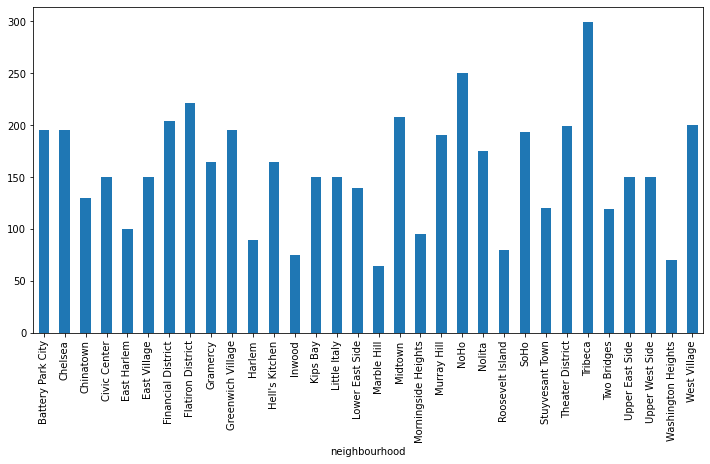

In [47]:
manhattan_hoods = manhattan.groupby("neighbourhood") # group by neighbourhood

manhattan_hoods['price'].median().plot.bar(figsize=(12,6)) # calculates medians, plots the graph